In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/data/nihaifeng/code/HeliosArtifact/simulator')
import utils

[2.5005506890157885, 2.8407634557514494, 4.320427231370085, 4.567452687916196, 5.01873500381931, 4.748047851484295]


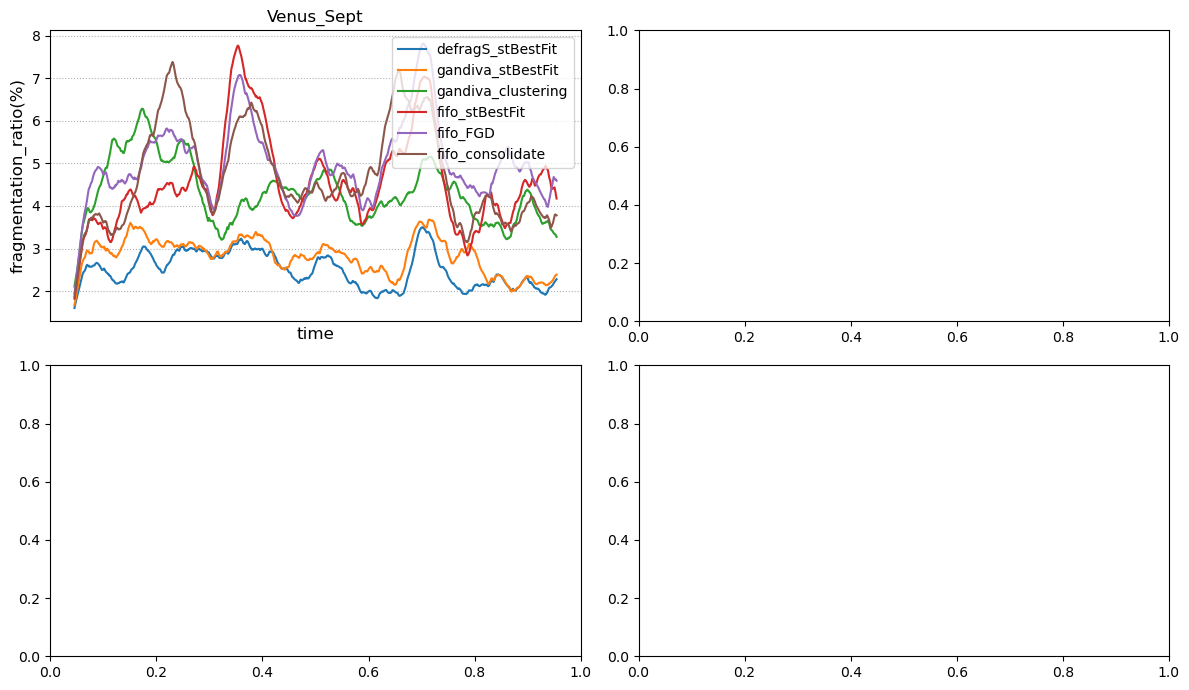

In [2]:
selector = 'fifo'
# schedulers = [f"defragS_{selector}_stBestFit", f"gandiva_{selector}", f"defragS_{selector}_FGD",]
schedulers = [f"defragS_stBestFit", f"gandiva_stBestFit", "gandiva_clustering",  f"{selector}_stBestFit", f"{selector}_FGD", f"{selector}_consolidate",] #   "fifo_clustering"
IDX = 3
log_dir = f"../log/new" 

month = 'Sept'#
experiments = ['Venus', ] #   'Earth', 'Saturn', 'Uranus',
window_size = 60 * 24 * 1
utilization = 'fragmentation_ratio' # ''gpu_utilization fragmentation_ratio

FIG_SIZE=(12, 7)
fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE)  # 创建 2x2 的子图网格
axes = axes.flatten()  # 将 2D 数组展开成 1D，方便索引

avg_fr = []
for idx, ept in enumerate(experiments):
	ax = axes[idx]  # 获取对应的子图
	for i, scheduler in enumerate(schedulers):
		df = pd.read_csv(log_dir + f'/{ept}_{month}/{ept}_{month}_{scheduler}/all/{scheduler}_all_seq.csv')
		y = df[utilization] * 100
		fr = y.rolling(window=window_size).mean()
		avg_fr.append(fr.mean())
		ax.plot(df['time'], fr, label=scheduler)
	
	ax.set_xlabel('time', fontsize=12)
	ax.set_title(f'{ept}_{month}', fontsize=12)
	ax.set_xticks([])  # 隐藏 x 轴刻度
	ax.set_ylabel(f'{utilization}(%)', fontsize=12)
	ax.legend(loc='best', fontsize=10)
	ax.grid(linestyle=':')
print(avg_fr)
# 调整子图间距
plt.tight_layout()
plt.show()


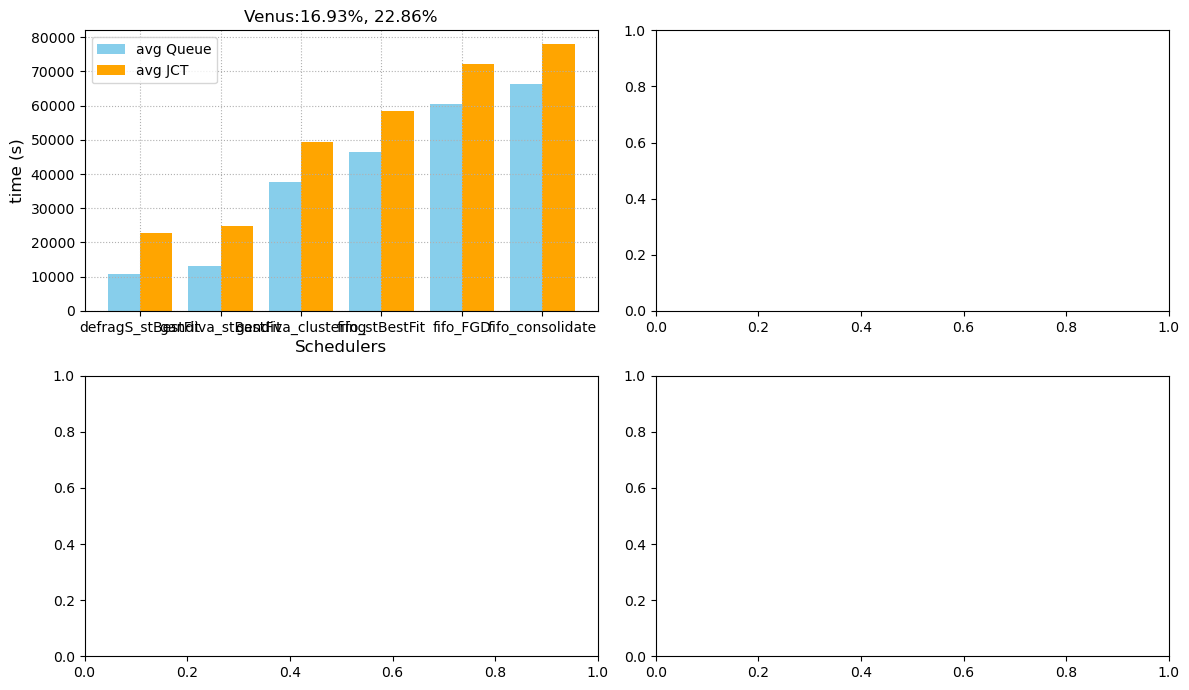

29.83627811614304 2


In [3]:
fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE)  # 创建 2x2 的子图网格
axes = axes.flatten()  # 将 2D 数组展开成 1D，方便索引

for idx, ept in enumerate(experiments):
	ax = axes[idx]  # 获取对应的子图
	que_list, jct_list = [], []
	for i, scheduler in enumerate(schedulers):
		df = pd.read_csv(log_dir+f'/{ept}_{month}/{ept}_{month}_{scheduler}/jct_avg.csv')
		jct_list.append(df.iloc[len(df)-1, 1])
		df = pd.read_csv(log_dir+f'/{ept}_{month}/{ept}_{month}_{scheduler}/que_avg.csv')
		que_list.append(df.iloc[len(df)-1, 1])

	# 设置柱状图的宽度和位置
	x_indices = np.arange(len(schedulers))  # x 轴位置
	bar_width = 0.4  # 每个柱的宽度

	# 绘制两组柱状图
	ax.bar(x_indices - bar_width/2, que_list, bar_width, label='avg Queue', color='skyblue')
	ax.bar(x_indices + bar_width/2, jct_list, bar_width, label='avg JCT', color='orange')

	ret = []
	dfs = que_list[0]
	tmp = que_list[1:IDX]
	ret.append(round((min(tmp)-dfs)/min(tmp)*100 ,2))
	dfs = que_list[IDX]
	tmp = que_list[IDX+1:]
	ret.append(round((min(tmp)-dfs)/min(tmp)*100,2))
	ax.set_title( f'{ept}:{ret[0]}%, {ret[1]}%', fontsize=12)
	ax.set_xlabel("Schedulers", fontsize=12)
	ax.set_ylabel("time (s)", fontsize=12)
	ax.set_xticks(x_indices)
	ax.set_xticklabels(schedulers)	
	ax.legend(loc='best', fontsize=10)
	ax.grid(linestyle=':')

# 调整子图间距
plt.tight_layout()
plt.show()
print(round(tmp[1]-dfs)/tmp[1]*100,2)

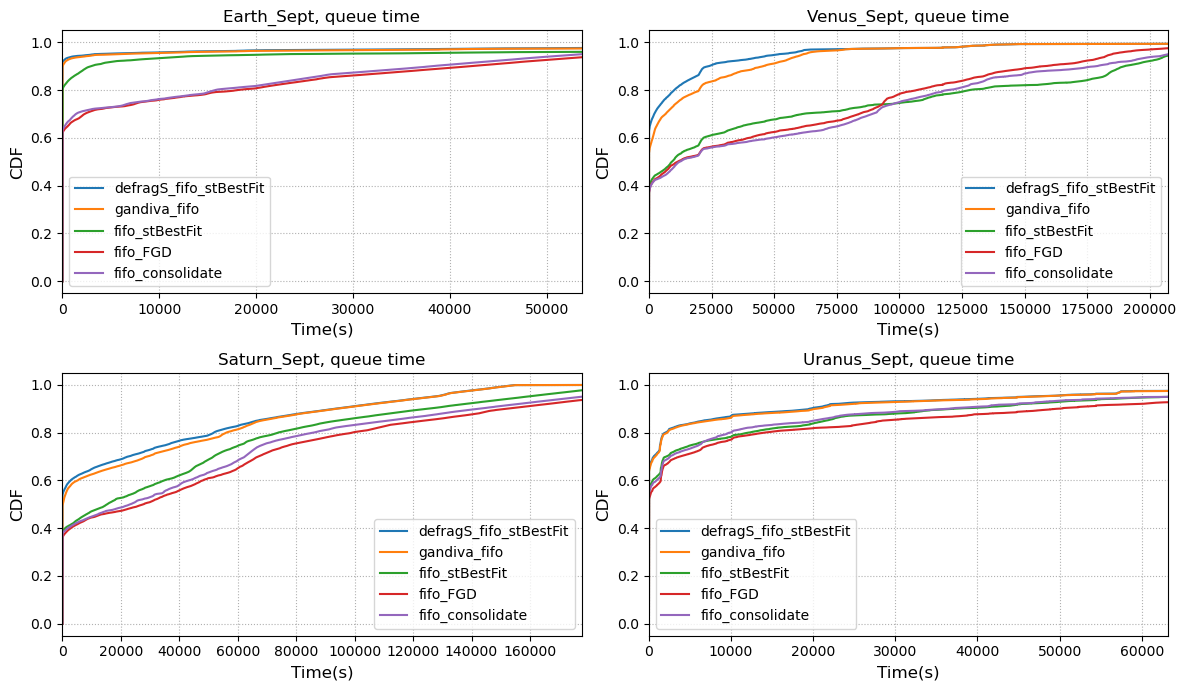

In [20]:
data_type = "queue"

fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE)  # 创建 2x2 的子图网格
axes = axes.flatten()  # 将 2D 数组展开成 1D，方便索引

for idx, ept in enumerate(experiments):
	ax = axes[idx]  # 获取对应的子图
	for idx, scheduler in enumerate(schedulers):
		df = pd.read_csv(log_dir+f'/{ept}_{month}/{ept}_{month}_{scheduler}/all/{scheduler}_all_log.csv')
		# df = df[df['gpu_num'] >= 8]
		y = df[data_type]
		sorted_y = np.sort(y)
		cdf = np.arange(1, len(sorted_y) + 1) / len(sorted_y)
		ax.plot(sorted_y, cdf, label=scheduler)

	x_min = np.min(sorted_y)
	x_max = np.percentile(sorted_y, 95)  # 选择中位数作为最大范围
	ax.set_xlim(x_min, x_max)  # 设置 x 轴范围

	ax.set_title(f'{ept}_{month}, {data_type} time', fontsize=12)
	ax.set_xlabel('Time(s)', fontsize=12)
	ax.set_ylabel('CDF', fontsize=12)
	ax.legend(loc='best', fontsize=10)
	ax.grid(linestyle=':')

# 调整子图间距
plt.tight_layout()
plt.show()

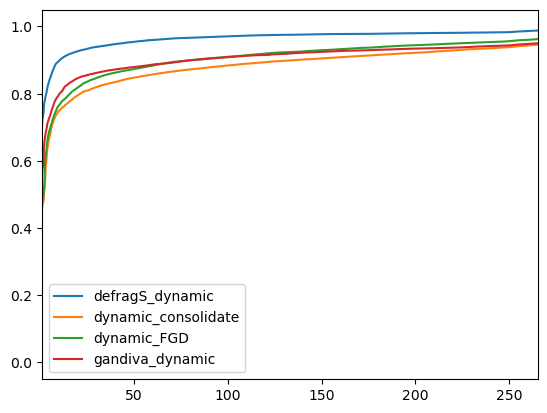

{}


In [4]:
slowdowns = {}
ept = 'Venus'
for scheduler in schedulers:
	df = pd.read_csv(log_dir+f'/{ept}_{month}/{ept}_{month}_{scheduler}/all/{scheduler}_all_log.csv')
	y = df['slowdown']
	sorted_y = np.sort(y)
	cdf = np.arange(1, len(sorted_y) + 1) / len(sorted_y)
	plt.plot(sorted_y, cdf, label=scheduler)
x_min = np.min(sorted_y)
x_max = np.percentile(sorted_y, 95)  # 选择中位数作为最大范围
plt.xlim(x_min, x_max)  # 设置 x 轴范围
plt.legend()
plt.show()
print(slowdowns)

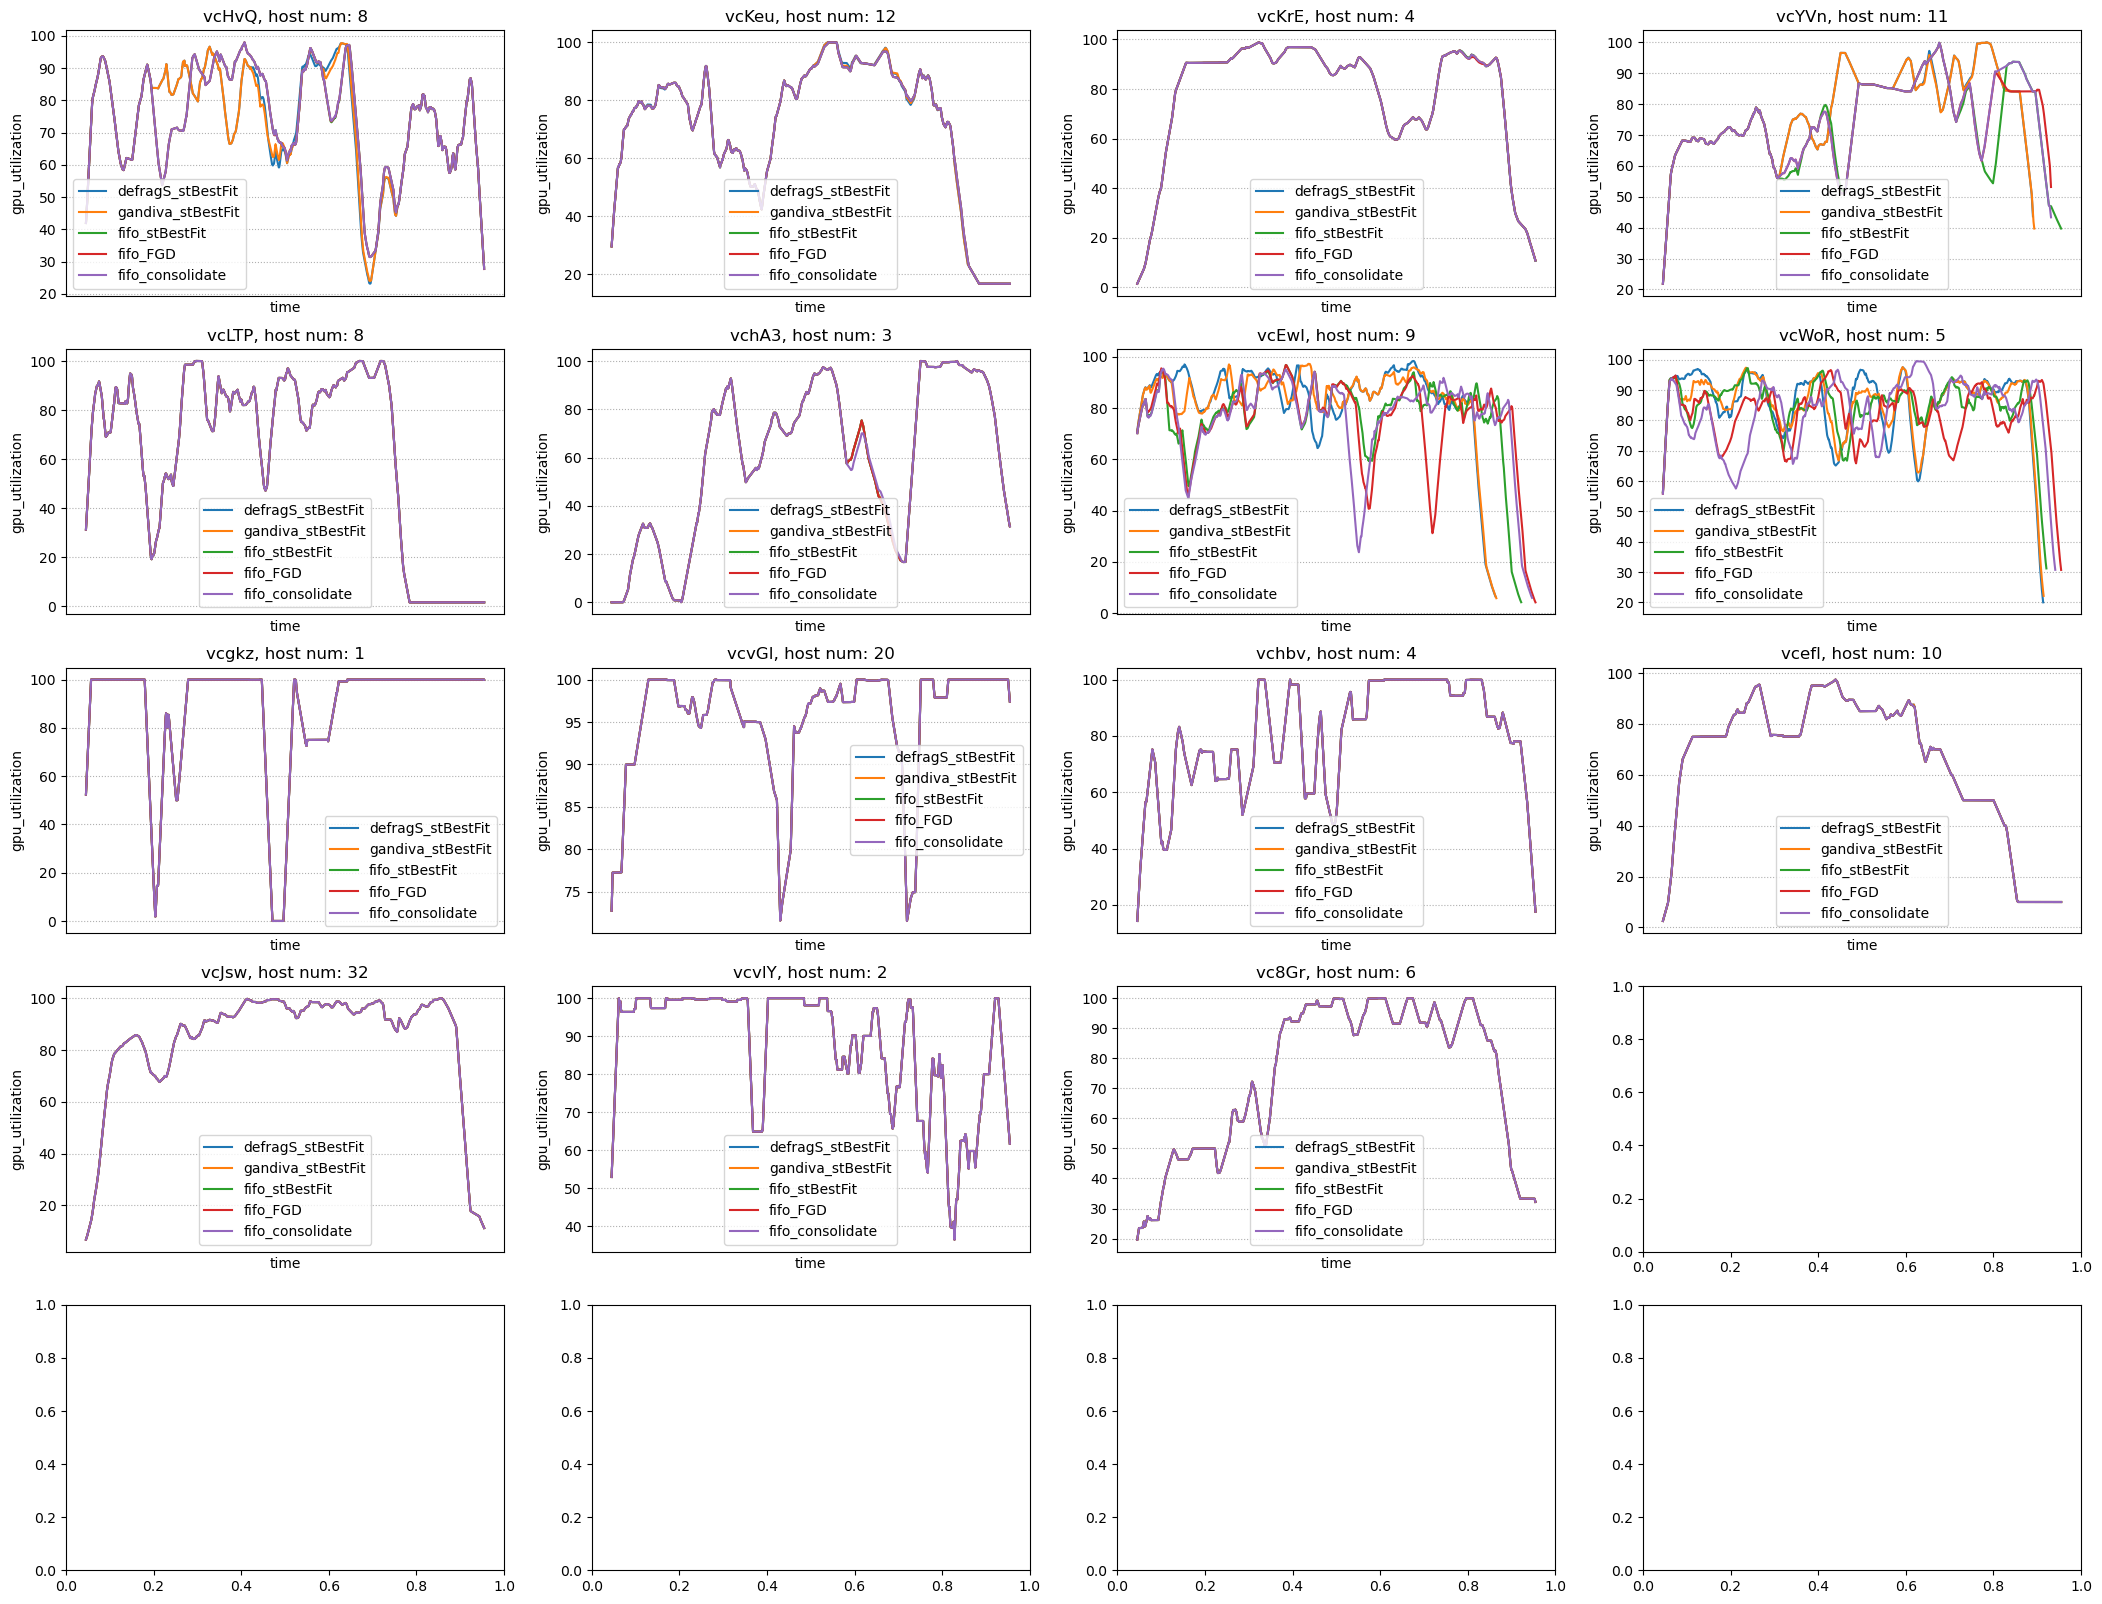

In [5]:
# 在每个VC中话不同调度算法的fragmentation_ratio或gpu_utilization曲线
experiment = 'Venus'

data_type = 'gpu_utilization'#  gpu_utilization
vc_dict = pd.read_pickle(f"/data/nihaifeng/code/HeliosArtifact/simulator/data/{experiment}/vc_dict_homo.pkl")

vc_ls = os.listdir(log_dir + f'/{experiment}_{month}/{experiment}_{month}_{schedulers[0]}')
vc_ls.remove('all')
vc_ls.remove('logfile')
vc_ls.remove('jct_avg.csv')
vc_ls.remove('que_avg.csv')

fig, axes = plt.subplots(5, 4, figsize=(26,20))
axes = axes.flatten() 
for idx, vc in enumerate(vc_ls):
	ax = axes[idx]
	for scheduler in schedulers:
		df = pd.read_csv(log_dir + f'/{experiment}_{month}/{experiment}_{month}_{scheduler}/{vc}/{scheduler}_{vc}_seq.csv')
		y = df[data_type]*100
		ax.plot(df['time'], y.rolling(window=window_size).mean(), label=scheduler)
	ax.set_ylabel(data_type)
	ax.set_xlabel('time')
	ax.set_title(f'{vc}, host num: {vc_dict[vc]}')
	ax.set_xticks([])
	ax.grid(linestyle=':')
	ax.legend(loc='best')
plt.show()
	

In [ ]:
###### jog req GPUs CDF 
trace_dir = '/data/nihaifeng/code/HeliosArtifact/simulator/data/'
experiments = ['Earth', 'Saturn', 'Uranus', 'Venus', 'Philly_new']
month = 'all'

fig = plt.figure(figsize=(10,6))
for epts in experiments:
	splits = epts.split('_')
	ept = epts.split('_')[0]
	suffix = epts.split('_')[1] if len(splits) > 1 else None

	vc_dict = pd.read_pickle(trace_dir+f'{ept}/vc_dict_homo.pkl')
	if ept == 'Philly':
		mutation = True if suffix == 'new' else False
		trace_range = trace_range = ('2017-10-01 00:00:00', '2017-11-30 23:59:00')
		trace_df, _ = utils.trace_philly_process(trace_dir+ept, trace_range, vc_dict, need_mutation=mutation)
	else:
		if 'Sept' == month:
			trace_range = ('2020-09-01 00:00:00', '2020-09-26 23:59:00')
		elif 'July' == month:
			trace_range = ('2020-07-01 00:00:00', '2020-07-31 23:59:00')
		elif 'all' == month:
			trace_range = ('2020-04-01 00:00:00', '2020-09-26 23:59:00')
		trace_df, _ = utils.trace_process(trace_dir+ept, trace_range, vc_dict)

	gpu_num_type = trace_df['gpu_num'].unique()
	gpu_num_type = sorted(gpu_num_type)
	y = [len(trace_df[trace_df['gpu_num'] == x]) for x in gpu_num_type]
	# 计算 CDF
	y_cumsum = np.cumsum(y)  # 累加频率
	y_cdf = y_cumsum / sum(y)  # 归一化
	# 绘制 CDF 图
	plt.step(gpu_num_type, y_cdf, where='post', label=f"{epts}: Hosts_{sum(vc_dict.values())}, Jobs_{trace_df.shape[0]}, >=8_job_ratio_{sum([y[i] for i in range(len(gpu_num_type)) if gpu_num_type[i] >= 8])/trace_df.shape[0]:.2f}")

plt.xlabel('GPU Number')
plt.ylabel('CDF')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(gpu_num_type)
plt.legend()
plt.tight_layout()
plt.show()